In [1]:
pip install koreanize-matplotlib

In [2]:

import numpy as np
import pandas as pd

import re
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [3]:
df_train = pd.read_csv('./data_file/game1.csv')
df_test = pd.read_csv('./data_file/game2.csv')

df = pd.concat([df_train, df_test], axis=0)
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,maxPlace,numGroups,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,0,24,0,0,5,247.30,2,0,4,17,1050,2,1,65.32,29,28,1,591.3,0,0.0,0,0,782.40,4,1458,0.8571
1,1,440875,1,1,0,37.65,1,1,0,45,1072,1,1,13.55,26,23,0,0.0,0,0.0,0,0,119.60,3,1511,0.0400
2,2,878242,2,0,1,93.73,1,0,2,54,1404,0,0,0.00,28,28,1,0.0,0,0.0,0,0,3248.00,5,1583,0.7407
3,3,1319841,3,0,0,95.88,0,0,0,86,1069,0,0,0.00,97,94,0,0.0,0,0.0,0,0,21.49,1,1489,0.1146
4,4,1757883,4,0,1,0.00,0,0,1,58,1034,0,0,0.00,47,41,0,0.0,0,0.0,0,0,640.80,4,1475,0.5217


### Data 전처리  

In [4]:
df.shape

(6225249, 26)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6225249 entries, 0 to 1867912
Data columns (total 26 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               int64  
 1   groupId          int64  
 2   matchId          int64  
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  maxPlace         int64  
 15  numGroups        int64  
 16  revives          int64  
 17  rideDistance     float64
 18  roadKills        int64  
 19  swimDistance     float64
 20  teamKills        int64  
 21  vehicleDestroys  int64  
 22  walkDistance     float64
 23  weaponsAcquired  int64  
 24  winPoints        int64  
 25  winPlacePerc     float64
dtypes: float64(6), int64(20)
memory usage: 1.3 GB


In [6]:
df.isnull().sum()

Id                       0
groupId                  0
matchId                  0
assists                  0
boosts                   0
damageDealt              0
DBNOs                    0
headshotKills            0
heals                    0
killPlace                0
killPoints               0
kills                    0
killStreaks              0
longestKill              0
maxPlace                 0
numGroups                0
revives                  0
rideDistance             0
roadKills                0
swimDistance             0
teamKills                0
vehicleDestroys          0
walkDistance             0
weaponsAcquired          0
winPoints                0
winPlacePerc       1867913
dtype: int64

In [7]:
df[df['winPlacePerc'].isna()].head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,maxPlace,numGroups,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,47734,1659463,47734,0,0,100.0,1,0,0,59,1000,0,0,0.000,50,45,0,0.0,0,0.0,1,0,421.50,7,1500,NaN
1,47735,1659508,47735,0,1,400.0,2,0,3,9,1200,4,2,15.420,48,47,1,0.0,0,0.0,0,0,655.80,4,1526,NaN
2,47736,1659555,47736,0,0,0.0,0,0,0,72,1216,0,0,0.000,29,28,0,0.0,0,0.0,0,0,74.58,1,1475,NaN
3,47737,1659621,47737,0,0,68.6,0,0,0,68,1177,0,0,0.000,97,92,0,0.0,0,0.0,0,0,167.20,2,1464,NaN
4,47738,1659675,47738,0,1,370.5,3,0,1,45,1013,1,1,5.968,27,26,0,0.0,0,0.0,0,0,146.70,3,1505,NaN


In [8]:
df = df.dropna()
df.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
maxPlace           0
numGroups          0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       0
dtype: int64

In [9]:
# ▶ Outlier 확인
df.describe()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,maxPlace,numGroups,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06
mean,3.102678e+06,1.024777e+06,2.385539e+04,2.656320e-01,9.636856e-01,1.329033e+02,6.901455e-01,2.385866e-01,1.187169e+00,4.703440e+01,1.080898e+03,9.344958e-01,5.547651e-01,1.987925e+01,4.207759e+01,4.058035e+01,1.649345e-01,4.238835e+02,2.557985e-03,4.136261e+00,1.388555e-02,5.146264e-03,1.055122e+03,3.457289e+00,1.500504e+03,4.718663e-01
std,1.797477e+06,6.967197e+05,1.378227e+04,6.342160e-01,1.560643e+00,1.699439e+02,1.191514e+00,6.103033e-01,2.366389e+00,2.732772e+01,1.237119e+02,1.566192e+00,7.223452e-01,4.586552e+01,2.267769e+01,2.206667e+01,4.672004e-01,1.222927e+03,6.346679e-02,2.757015e+01,1.329266e-01,7.425362e-02,1.116122e+03,2.402109e+00,4.253571e+01,3.079147e-01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.550000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.500000e+02,0.000000e+00
25%,1.537746e+06,4.741378e+05,1.191400e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.300000e+01,1.000000e+03,0.000000e+00,0.000000e+00,0.000000e+00,2.800000e+01,2.600000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.334000e+02,2.000000e+00,1.491000e+03,1.979000e-01
50%,3.110606e+06,9.430320e+05,2.383700e+04,0.000000e+00,0.000000e+00,8.776000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,1.029000e+03,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+01,2.900000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.732000e+02,3.000000e+00,1.500000e+03,4.583000e-01
75%,4.657295e+06,1.418544e+06,3.580100e+04,0.000000e+00,1.000000e+00,1.884000e+02,1.000000e+00,0.000000e+00,1.000000e+00,7.000000e+01,1.126000e+03,1.000000e+00,1.000000e+00,1.629000e+01,4.900000e+01,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.808000e+03,5.000000e+00,1.510000e+03,7.407000e-01
max,6.224522e+06,2.700605e+06,4.773300e+04,2.000000e+01,1.800000e+01,6.384000e+03,6.300000e+01,2.600000e+01,5.900000e+01,1.000000e+02,2.047000e+03,6.000000e+01,1.400000e+01,1.323000e+03,1.000000e+02,1.000000e+02,4.100000e+01,4.839000e+04,4.200000e+01,5.286000e+03,6.000000e+00,5.000000e+00,1.730000e+04,7.600000e+01,1.923000e+03,1.000000e+00


In [10]:
df.to_csv('game_data.csv', index=False)

### Data EDA


In [11]:
for i in ['Id','groupId','matchId']:
    print(f'unique [{i}] count:', df[i].nunique())

unique [Id] count: 4357336
unique [groupId] count: 1888732
unique [matchId] count: 47734


In [12]:
df[df['kills']>1].sort_values('kills',ascending=False).head(20)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,maxPlace,numGroups,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
910050,1297658,1989564,5518,11,0,6384.0,63,26,0,1,1000,60,7,7.941,8,8,3,0.0,0,0.0,3,0,2384.000,4,1500,1.0000
121828,162743,718914,26362,12,0,4981.0,0,11,7,1,1000,49,5,100.100,24,16,0,0.0,0,0.0,0,0,270.600,50,1500,1.0000
74095,94553,718922,26362,8,0,4222.0,0,7,0,2,1000,48,3,83.120,24,16,0,1003.0,0,0.0,0,0,1168.000,56,1500,0.9565
3012841,4303492,197124,1441,0,0,3886.0,0,0,1,1,1112,42,6,11.110,96,95,0,21810.0,42,0.0,0,0,293.100,5,1496,0.9895
26362,26362,718925,26362,13,0,3864.0,0,7,23,4,1000,41,3,109.900,24,16,0,0.0,0,0.0,0,0,364.800,47,1500,0.9130
769929,1096668,2591968,7523,15,0,4292.0,44,13,10,1,1000,41,4,175.200,18,16,4,0.0,0,0.0,1,0,299.000,40,1500,1.0000
217293,299122,718925,26362,7,0,3479.0,0,4,1,3,1000,41,4,105.300,24,16,0,0.0,0,0.0,0,0,50.260,57,1500,0.9130
55524,75982,2603573,7790,3,0,3821.0,0,8,40,1,1000,41,3,112.300,18,14,0,0.0,0,0.0,0,0,330.900,45,1500,1.0000
523385,727928,1593360,46218,3,0,3758.0,32,9,8,1,1000,39,5,203.700,7,7,0,0.0,0,0.0,0,0,2585.000,13,1500,0.8333
260567,362853,524936,21904,3,1,3413.0,23,6,5,1,1000,37,5,203.100,19,18,0,0.0,0,0.0,0,0,329.600,12,1500,1.0000


In [13]:
df[df['kills']>1]['kills'].value_counts()

kills
2     465632
3     229589
4     122488
5      65929
6      37406
7      21820
8      12941
9       7809
10      4714
11      2886
12      1852
13      1156
14       774
15       566
16       369
17       309
18       204
19       130
20       121
21        94
22        60
24        45
23        44
26        31
25        27
27        22
28        12
29        10
30        10
32         9
31         9
36         6
34         5
33         4
41         4
48         1
49         1
37         1
35         1
39         1
60         1
42         1
Name: count, dtype: int64

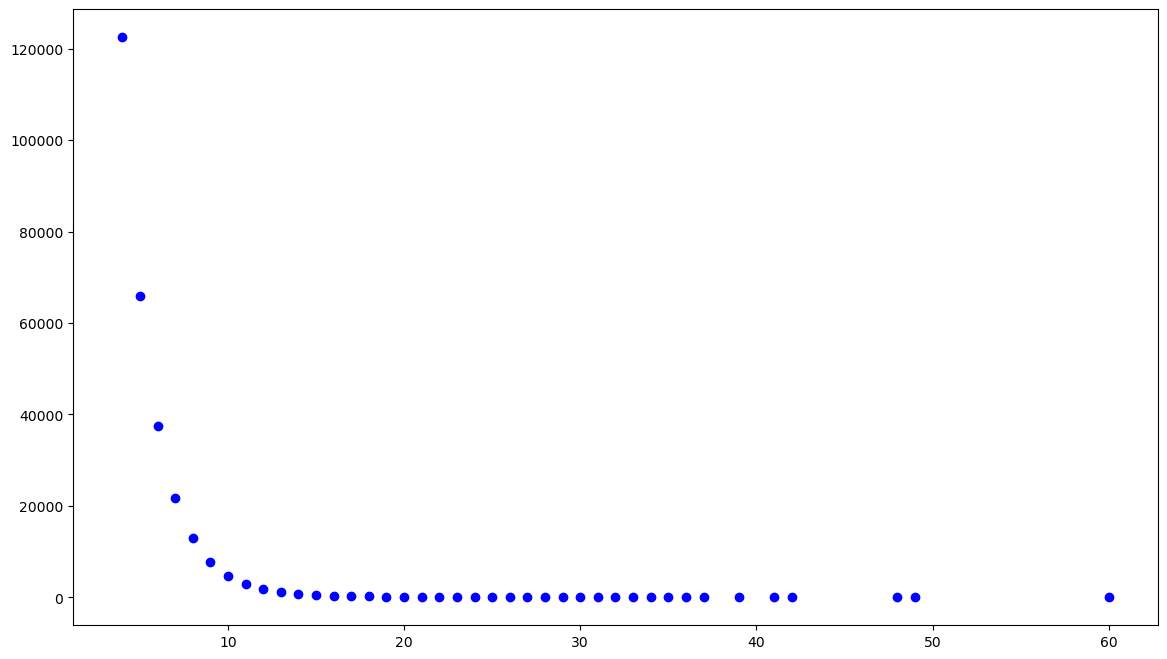

In [14]:
kp = df[df['kills']>3]['kills'].value_counts().reset_index(name='count')
plt.figure(figsize=(14,8))
plt.plot(kp['kills'], kp['count'], marker='o', linestyle='', color='b')
plt.show()

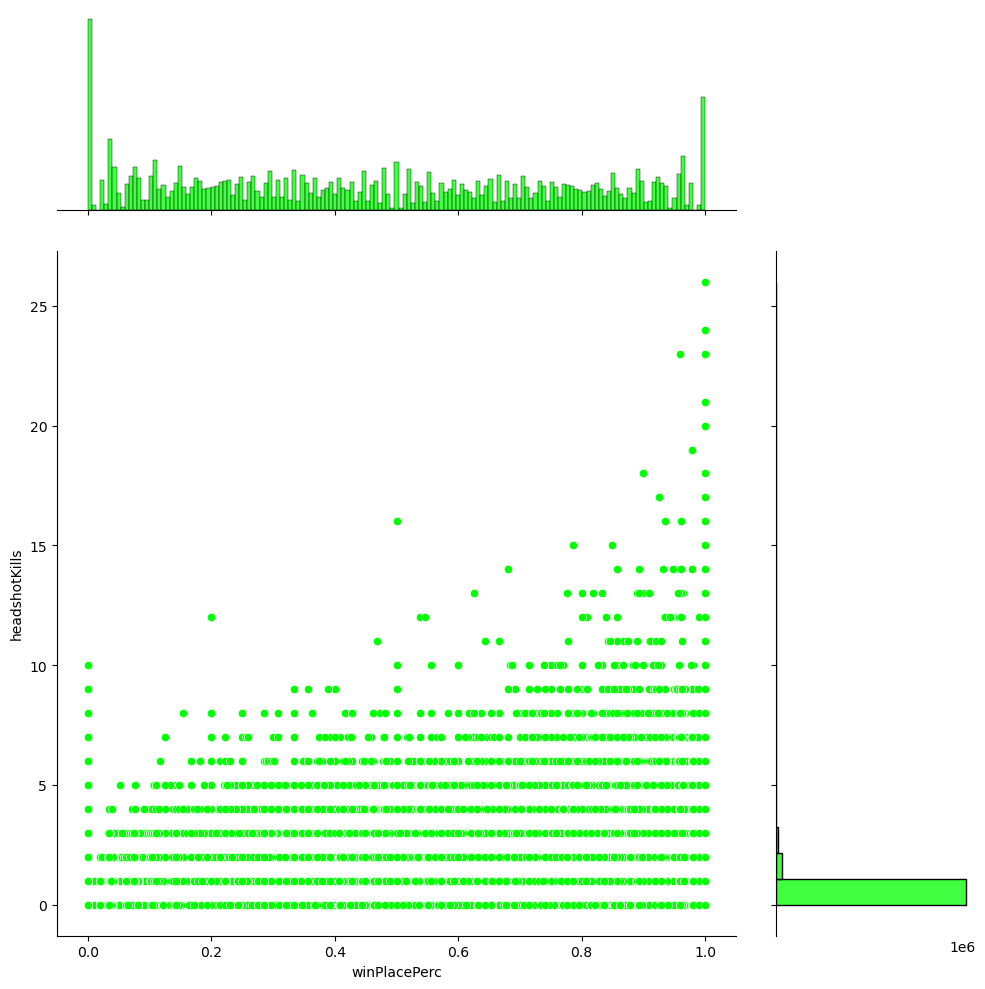

In [16]:
sns.jointplot(x='winPlacePerc',y='headshotKills', data=df, height=10, ratio=3, color="red")
plt.show()

## 이상 데이터 정의 


In [17]:
df['_totalDistance'] = df['rideDistance'] + df['walkDistance'] + df['swimDistance']

df['_headshot_rate'] = df['headshotKills']/df['kills']
df['_headshot_rate'] = df['_headshot_rate'].fillna(0)

### 1. 헤드샷 이상
---

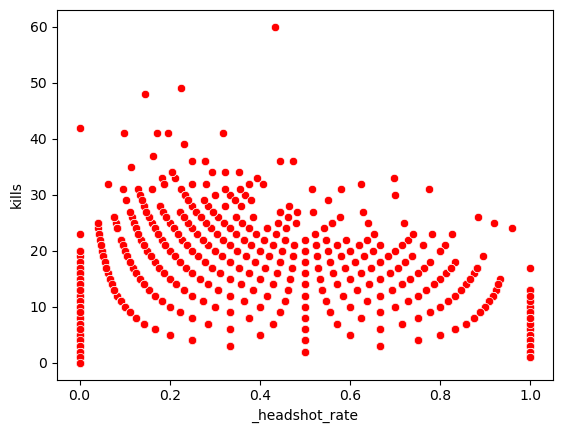

In [18]:
# ▶ 100% Headshot만 하는 유저가 존재할까?
sns.scatterplot(x='_headshot_rate',y='kills', data=df, color="red");

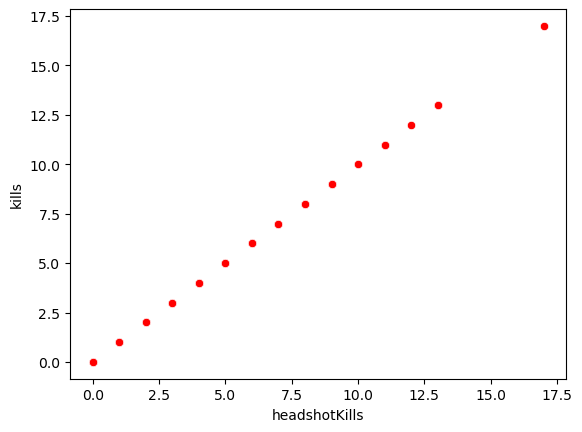

In [19]:
all_h = df[(df['kills'])==(df['headshotKills'])]
sns.scatterplot(x='headshotKills',y='kills', data=all_h, color="red");

In [20]:
df[df['kills']>0]['kills'].describe()

count    1.893264e+06
mean     2.150737e+00
std      1.740591e+00
min      1.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      6.000000e+01
Name: kills, dtype: float64

In [21]:
df['headshotKills'].describe()

count    4.357336e+06
mean     2.385866e-01
std      6.103033e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.600000e+01
Name: headshotKills, dtype: float64

In [22]:
(df[df['kills']>0]['kills'].mean()) + 3*(df[df['kills']>0]['kills'].std())

7.372508894417628

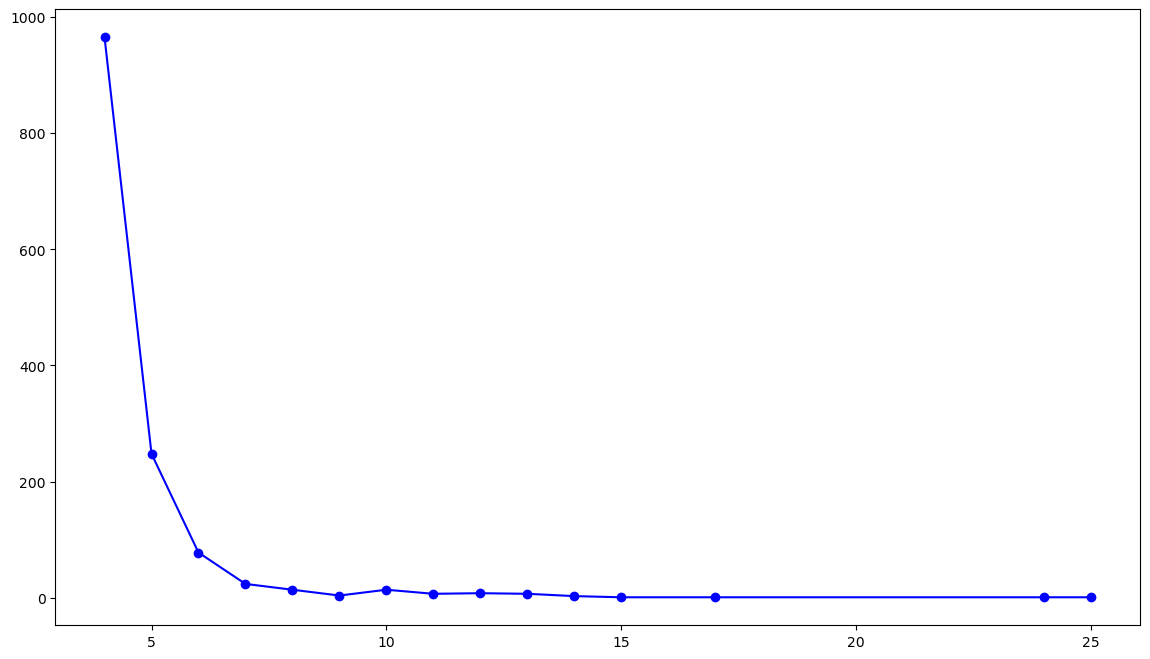

In [23]:
kp = df[(df['kills']>3)&(df['_headshot_rate']>=0.9)].groupby('kills')['Id'].count().reset_index()
plt.figure(figsize=(14,8))
plt.plot(kp['kills'], kp['Id'], marker='o', linestyle='-', color='b')
plt.show()

In [24]:
248*100/4357336

0.005691550984362923

In [25]:
kp

,kills,Id
0,4,965
1,5,248
2,6,78
3,7,24
4,8,14
5,9,4
6,10,14
7,11,7
8,12,8
9,13,7


In [26]:
len(df[(df['kills']>=df['kills'].quantile(0.999))&(df['_headshot_rate']>=0.9)])

22

In [91]:
df['kills'].quantile(0.999)

12.0

In [27]:
ld1 = df[(df['kills']>=df['kills'].quantile(0.999))&(df['_headshot_rate']>=0.9)]

In [92]:
ld1.shape

(22, 28)

### 2. 무기 / 아이템 사용 없이 많은 킬
---

<Axes: xlabel='kills', ylabel='heals'>

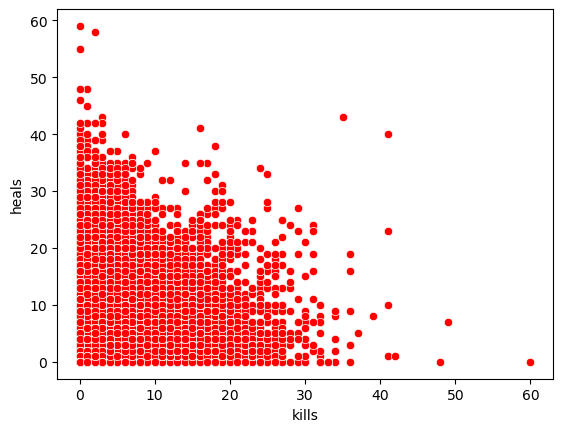

In [28]:
# ▶ heal 없이 Kill 수가 많은 버그 유저가 존재할까?
sns.scatterplot(x='kills',y='heals', data=df, color="red")

<Axes: xlabel='kills', ylabel='boosts'>

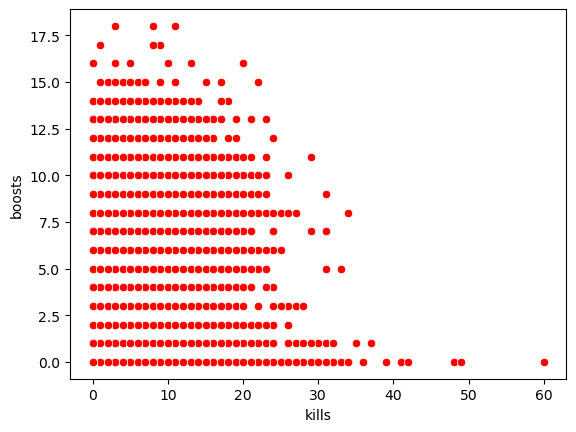

In [29]:
sns.scatterplot(x='kills',y='boosts', data=df, color="red")

In [30]:
len(df[(df['heals']==0)&(df['boosts']==0)&(df['kills']>=10)])

584

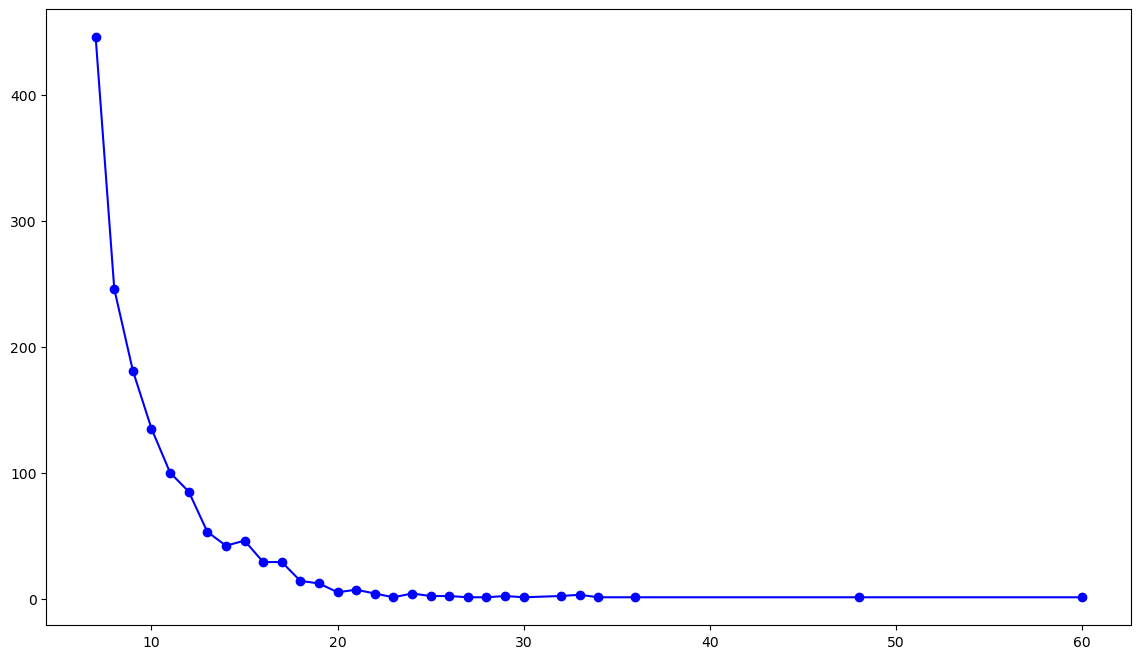

In [31]:
kp = df[(df['heals']==0)&(df['boosts']==0)&(df['kills']>=7)].groupby('kills')['Id'].count().reset_index()
plt.figure(figsize=(14,8))
plt.plot(kp['kills'], kp['Id'], marker='o', linestyle='-', color='b')
plt.show()

In [32]:
df[df['kills']>0]['heals'].mean()

1.9350914610957584

In [33]:
df[df['kills']>0]['heals'].quantile(0.9999)

30.0

In [34]:
df[df['kills']>0]['boosts'].quantile(0.9999)

13.0

In [36]:
len(df[(df['heals']==0)&(df['boosts']==0)&(df['kills']>=df['kills'].quantile(0.999))])

349

In [37]:
ld2 = df[(df['heals']==0)&(df['boosts']==0)&(df['kills']>=df['kills'].quantile(0.999))]

<Axes: xlabel='kills', ylabel='weaponsAcquired'>

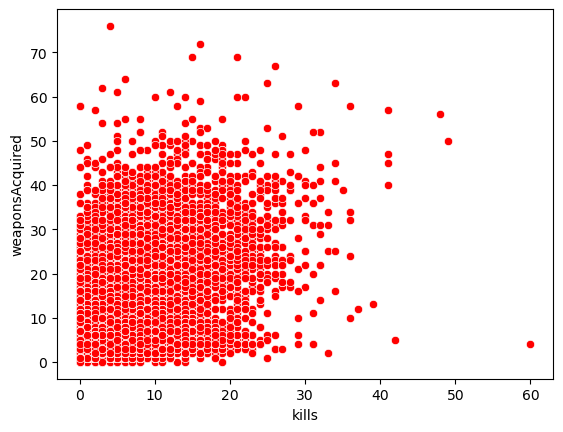

In [38]:
sns.scatterplot(x='kills',y='weaponsAcquired', data=df, color="red")

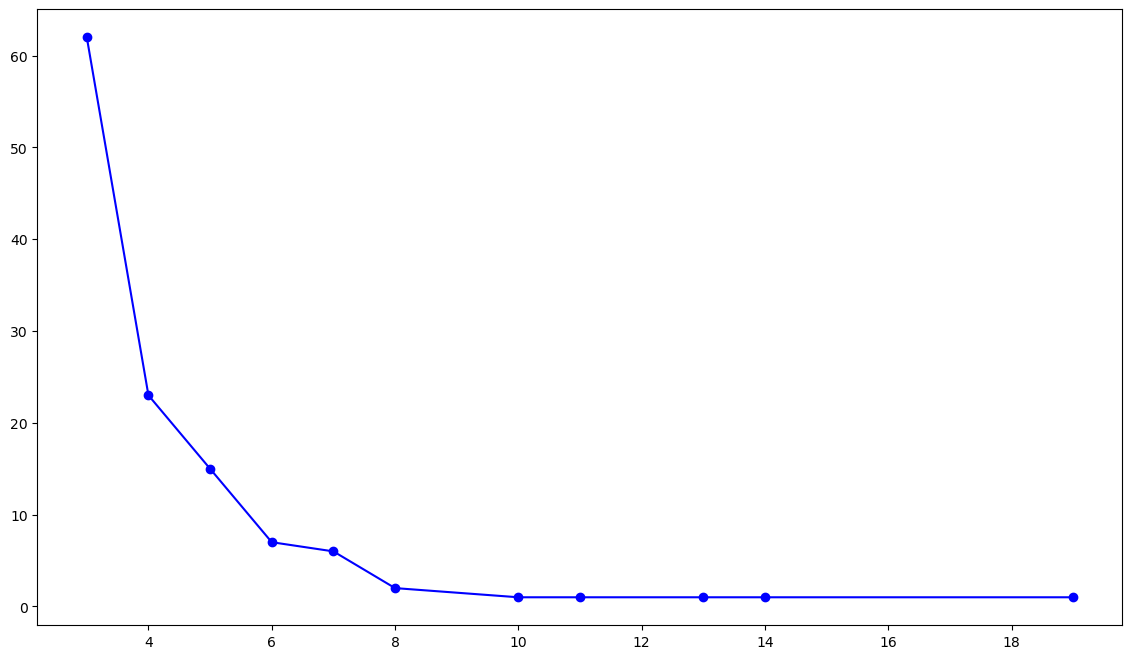

In [39]:
kp = df[(df['weaponsAcquired']==0)&(df['kills']>=3)].groupby('kills')['Id'].count().reset_index()
plt.figure(figsize=(14,8))
plt.plot(kp['kills'], kp['Id'], marker='o', linestyle='-', color='b')
plt.show()

In [41]:
len(df[(df['weaponsAcquired']==0)&(df['kills']>=df['kills'].quantile(0.999))])

3

In [42]:
ld3 = df[(df['weaponsAcquired']==0)&(df['kills']>=df['kills'].quantile(0.999))]

### 3. 무기 / 아이템 획득/사용 이상치
---

<Axes: xlabel='heals', ylabel='Density'>

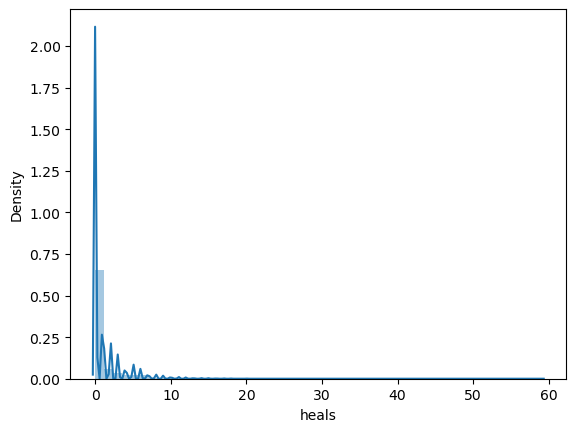

In [43]:
# ▶ 치료제(Heal)을 너무 많이 쓰는 유저가 존재할까?
sns.distplot(df['heals'])

In [44]:
df[df['kills']>0]['heals'].describe()

count    1.893264e+06
mean     1.935091e+00
std      2.838581e+00
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e+00
75%      3.000000e+00
max      5.800000e+01
Name: heals, dtype: float64

In [45]:
df[df['kills']>0]['heals'].quantile(0.9999)

30.0

In [95]:
df['heals'].quantile(0.999)


19.0

In [46]:
len(df[(df['kills']>0)&(df['heals']>=df[df['kills']>0]['heals'].quantile(0.9999))])

198

In [47]:
ld4 = df[(df['kills']>0)&(df['heals']>=df[df['kills']>0]['heals'].quantile(0.9999))]

<Axes: xlabel='boosts', ylabel='Density'>

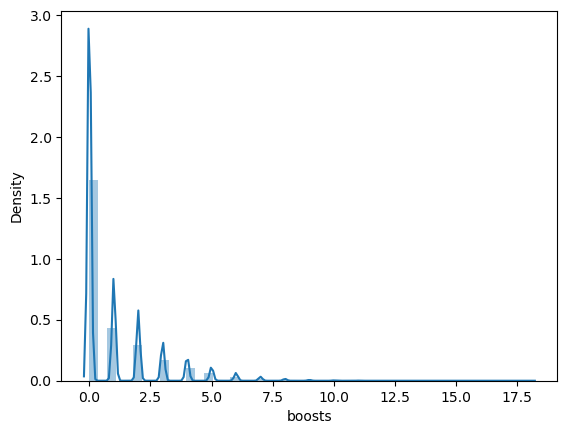

In [48]:
sns.distplot(df['boosts'])

In [107]:
df[df['kills']>0]['boosts'].quantile(0.9999)

13.0

In [49]:
len(df[(df['kills']>0)&(df['boosts']>=df[df['kills']>0]['boosts'].quantile(0.9999))])

204

In [50]:
ld5 = df[(df['kills']>0)&(df['boosts']>=df[df['kills']>0]['boosts'].quantile(0.9999))]

<Axes: xlabel='weaponsAcquired', ylabel='Density'>

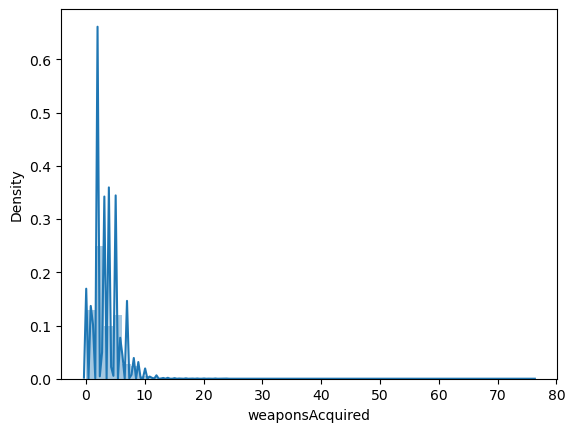

In [51]:
sns.distplot(df['weaponsAcquired'])

In [111]:
df[df['kills']>0]['weaponsAcquired'].quantile(0.9999)

42.0

In [52]:
len(df[(df['kills']>0)&(df['weaponsAcquired']>=df[df['kills']>0]['weaponsAcquired'].quantile(0.9999))])

204

In [53]:
ld6 = df[(df['kills']>0)&(df['weaponsAcquired']>=df[df['kills']>0]['weaponsAcquired'].quantile(0.9999))]

### 4. 이동거리 없음 -> 무기, 아이템 획득 
---

<Axes: xlabel='_totalDistance', ylabel='weaponsAcquired'>

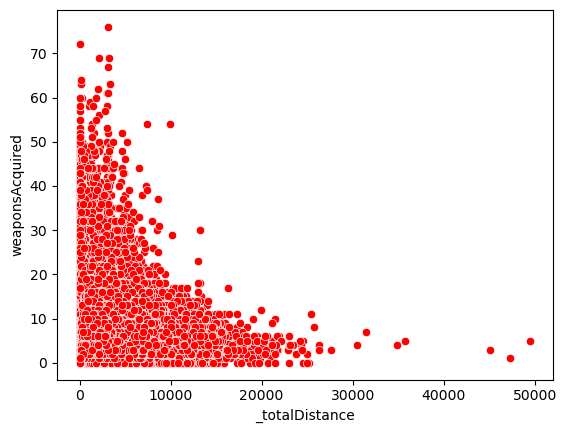

In [54]:
# ▶ 이동없이 무기를 획득하는 유저가 존재할까?
sns.scatterplot(x='_totalDistance',y='weaponsAcquired', data=df, color="red")

In [114]:
df['weaponsAcquired'].quantile(0.9999)

37.0

In [113]:
len(df[(df['weaponsAcquired']>df['weaponsAcquired'].quantile(0.9999))&(df['_totalDistance']==0)])


26

In [97]:
df['weaponsAcquired'].mean()+3*(df['weaponsAcquired'].std())

10.663616867148091

In [55]:
len(df[(df['weaponsAcquired']>df['weaponsAcquired'].mean()+3*(df['weaponsAcquired'].std()))&(df['_totalDistance']==0)])

938

In [56]:
ld7 = df[(df['weaponsAcquired']>df['weaponsAcquired'].mean()+3*(df['weaponsAcquired'].std()))&(df['_totalDistance']==0)]

<Axes: xlabel='_totalDistance', ylabel='heals'>

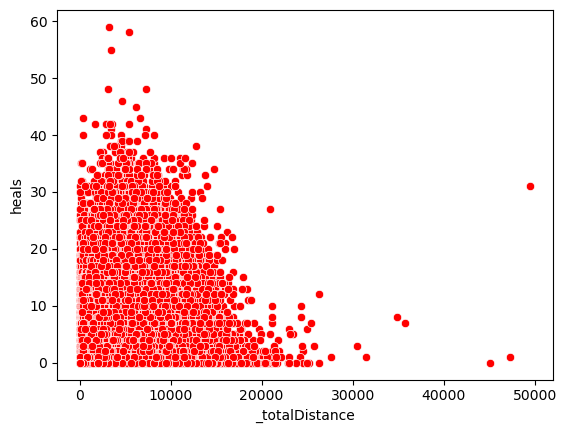

In [57]:
sns.scatterplot(x='_totalDistance',y='heals', data=df, color="red")

In [115]:
df['heals'].quantile(0.9999)

28.0

In [116]:
len(df[(df['heals']>df['heals'].quantile(0.9999))&(df['_totalDistance']==0)])

1

In [98]:
df['heals'].mean()+3*(df['heals'].std())

8.286334471531285

In [58]:
len(df[(df['heals']>df['heals'].mean()+3*(df['heals'].std()))&(df['_totalDistance']==0)])

95

In [59]:
ld8 = df[(df['heals']>df['heals'].mean()+3*(df['heals'].std()))&(df['_totalDistance']==0)]

<Axes: xlabel='_totalDistance', ylabel='boosts'>

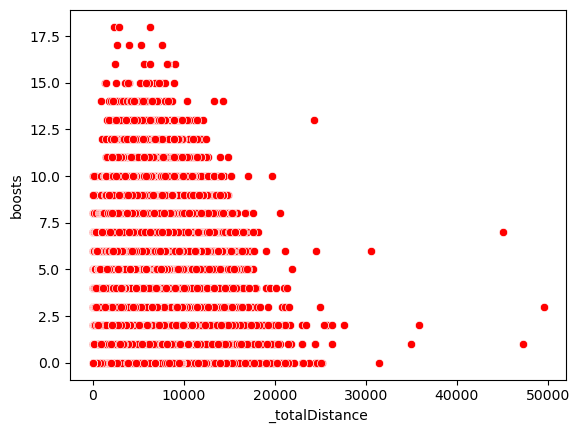

In [60]:
sns.scatterplot(x='_totalDistance',y='boosts', data=df, color="red")

In [117]:
df['boosts'].quantile(0.9999)

12.0

In [118]:
len(df[(df['boosts']>df['boosts'].quantile(0.9999))&(df['_totalDistance']==0)])

0

In [99]:
df['boosts'].mean()+3*(df['boosts'].std())

5.645613740762701

In [61]:
len(df[(df['boosts']>df['boosts'].mean()+3*(df['boosts'].std()))&(df['_totalDistance']==0)])

1

In [62]:
ld9 = df[(df['boosts']>df['boosts'].mean()+3*(df['boosts'].std()))&(df['_totalDistance']==0)]

### 5. 부활 횟수
---

<Axes: xlabel='revives', ylabel='Density'>

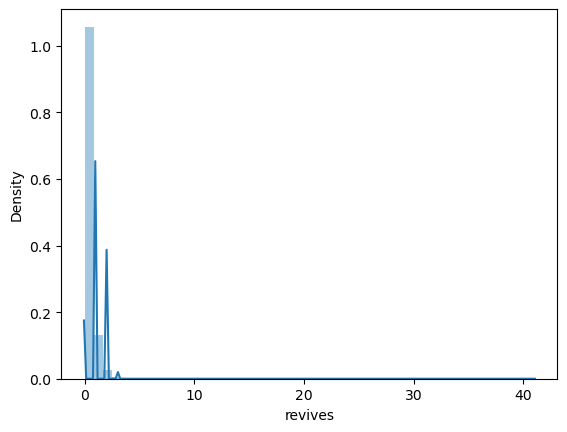

In [63]:
sns.distplot(df['revives'])

<Axes: xlabel='revives', ylabel='kills'>

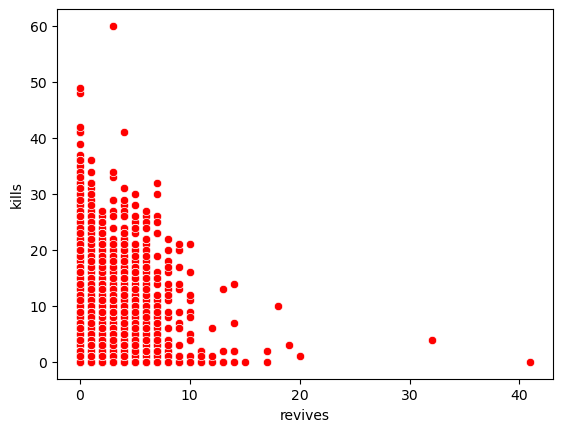

In [64]:
sns.scatterplot(x='revives',y='kills', data=df, color="red")

In [65]:
df['revives'].describe()

count    4.357336e+06
mean     1.649345e-01
std      4.672004e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      4.100000e+01
Name: revives, dtype: float64

In [66]:
df[df['revives']>0]['revives'].describe()

count    579499.000000
mean          1.240166
std           0.554784
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          41.000000
Name: revives, dtype: float64

In [67]:
df[df['revives']>0]['revives'].mean()+3*df[df['revives']>0]['revives'].std()

2.904516620519525

In [68]:
df[df['revives']>0]['revives'].quantile(0.9999)

9.0

In [69]:
len(df[df['revives']>=df[df['revives']>0]['revives'].quantile(0.9999)])

59

In [70]:
len(df[df['revives']>=20])

3

In [71]:
df[df['DBNOs']>0]['DBNOs'].describe()

count    1.706830e+06
mean     1.761860e+00
std      1.317623e+00
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      6.300000e+01
Name: DBNOs, dtype: float64

### 6. 팀킬
---

<Axes: xlabel='teamKills', ylabel='kills'>

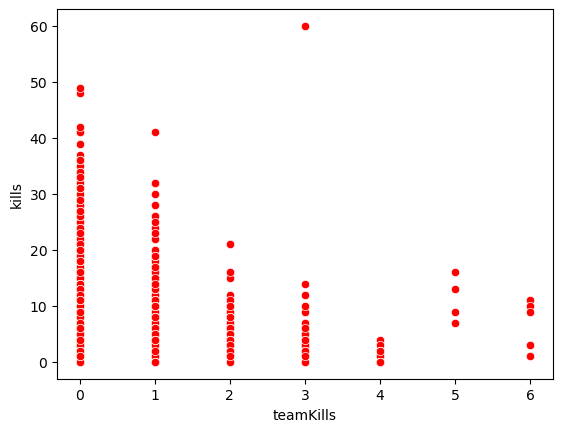

In [72]:
sns.scatterplot(x='teamKills',y='kills', data=df, color="red")

In [73]:
len(df[(df['kills']==0)&(df['teamKills']>3)])

64

In [74]:
len(df[(df['teamKills']>=5)])

10

### 1

In [75]:
ld1.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,maxPlace,numGroups,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,_totalDistance,_headshot_rate
117110,158025,513885,21643,3,1,1165.0,7,11,3,3,1000,12,2,137.40,9,9,0,0.0,0,0.000,0,0,506.1,20,1500,1.0000,506.100,0.916667
259837,362123,493399,21174,1,11,1286.0,0,12,0,1,1084,13,2,315.90,96,95,0,0.0,0,0.000,0,0,3367.0,5,1458,1.0000,3367.000,0.923077
520193,724736,1452896,43018,1,2,2938.0,21,23,2,1,1188,24,3,154.60,29,28,0,1786.0,0,5.664,0,0,1768.0,4,1492,1.0000,3559.664,0.958333
561170,786121,1159559,36383,0,5,1201.0,0,11,1,1,1000,12,2,250.40,98,95,0,4001.0,0,0.000,0,0,2280.0,5,1500,1.0000,6281.000,0.916667
706594,992672,1288166,39273,0,0,1257.0,0,11,0,1,1027,12,4,1.19,99,83,0,0.0,0,0.000,0,0,346.6,3,1511,0.6429,346.600,0.916667


In [76]:
df1 = ld1.copy()

### 2

In [77]:
ld2.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,maxPlace,numGroups,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,_totalDistance,_headshot_rate
531,531,1899557,531,5,0,1301.0,12,5,0,2,1000,16,3,142.100,9,8,0,0.0,0,0.0,0,0,184.3,21,1500,1.0000,184.3,0.312500
1777,1777,344864,1777,6,0,1087.0,13,6,0,1,1000,12,2,1.539,4,4,5,0.0,0,0.0,0,0,0.0,9,1500,1.0000,0.0,0.500000
3184,3184,959435,3184,3,0,1230.0,0,7,0,6,1000,12,3,110.600,41,24,0,0.0,0,0.0,0,0,165.0,21,1500,0.9000,165.0,0.583333
3294,3294,1008068,3294,1,0,1469.0,13,8,0,1,1349,13,4,233.100,28,28,0,0.0,0,0.0,0,0,2642.0,5,1535,0.9259,2642.0,0.615385
3612,3612,1148248,3612,12,0,2322.0,19,5,0,2,1000,18,2,87.960,5,5,0,0.0,0,0.0,0,0,0.0,33,1500,0.7500,0.0,0.277778


In [78]:
ld3.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,maxPlace,numGroups,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,_totalDistance,_headshot_rate
333116,455859,1615903,46724,0,0,1900.0,14,13,0,1,1059,19,10,0.8129,29,21,0,665.8,0,66.59,0,0,1759.00,0,1521,0.9643,2491.39,0.684211
1433521,2043714,2685079,9644,0,0,1378.0,8,3,0,1,1279,14,13,1.1300,27,6,0,0.0,0,0.00,0,0,38.77,0,1591,0.6154,38.77,0.214286
1911204,2722982,336359,17594,0,1,1319.0,10,2,0,1,1388,13,4,1.4070,28,24,0,4028.0,0,0.00,0,0,1532.00,0,1503,0.3333,5560.00,0.153846


In [79]:
df2 = pd.concat([ld2,ld3])

In [80]:
df2 = df2.drop_duplicates()

### 3

In [81]:
ld4.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,maxPlace,numGroups,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,_totalDistance,_headshot_rate
6049,6049,2222655,6049,0,6,226.6,0,0,48,24,1388,1,1,14.44,96,93,0,5330.0,0,0.0,0,0,1949.0,6,1573,0.9053,7279.0,0.000000
16876,16876,304254,16876,0,6,251.8,0,0,33,15,1145,1,1,17.20,94,80,0,6792.0,0,0.0,0,0,1656.0,5,1500,0.9462,8448.0,0.000000
26380,26380,719661,26380,2,0,2262.0,0,2,33,3,1000,25,3,31.90,16,11,0,2020.0,0,0.0,0,0,1032.0,33,1500,0.8667,3052.0,0.080000
35006,35006,1099930,35006,0,7,538.9,1,0,34,13,1387,2,1,34.29,47,47,0,5313.0,0,0.0,0,0,1963.0,5,1690,0.9565,7276.0,0.000000
55524,75982,2603573,7790,3,0,3821.0,0,8,40,1,1000,41,3,112.30,18,14,0,0.0,0,0.0,0,0,330.9,45,1500,1.0000,330.9,0.195122


In [82]:
ld5.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,maxPlace,numGroups,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,_totalDistance,_headshot_rate
12299,12299,102643,12299,2,13,395.2,2,1,2,3,1113,4,1,275.80,28,26,0,4376.0,0,0.0,0,0,2355.0,6,1516,1.0000,6731.0,0.25
21466,21466,506183,21466,1,13,1008.0,0,2,4,1,1438,10,1,273.50,92,84,0,6115.0,0,0.0,0,0,3392.0,6,1576,1.0000,9507.0,0.20
27138,27138,753169,27138,1,14,1147.0,7,4,7,2,1290,10,2,209.10,46,41,1,1769.0,0,0.0,0,0,2859.0,9,1553,0.9333,4628.0,0.40
43777,43777,1485715,43777,1,14,912.1,4,0,19,3,1545,5,2,120.70,25,23,2,454.4,0,0.0,0,0,4152.0,6,1594,0.9583,4606.4,0.00
58890,79348,52129,11156,0,15,631.9,3,0,11,1,1117,7,2,30.16,49,47,1,3892.0,0,0.0,0,0,2979.0,4,1444,0.9583,6871.0,0.00


In [83]:
ld6.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,maxPlace,numGroups,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,_totalDistance,_headshot_rate
7498,7498,2590560,7498,5,0,1470.0,0,2,11,7,1000,12,2,38.23,10,8,0,1968.00,0,0.0,0,0,1013.00,61,1500,0.3333,2981.00,0.166667
7790,7790,2603586,7790,8,0,2413.0,0,4,4,10,1000,21,3,225.10,18,14,0,0.00,0,0.0,0,0,212.20,60,1500,0.5294,212.20,0.190476
15075,15075,225195,15075,5,3,1379.0,13,7,17,8,1000,17,3,66.82,8,8,2,0.00,0,0.0,0,0,38.32,49,1500,0.8571,38.32,0.411765
26362,26362,718925,26362,13,0,3864.0,0,7,23,4,1000,41,3,109.90,24,16,0,0.00,0,0.0,0,0,364.80,47,1500,0.9130,364.80,0.170732
29194,29194,844101,29194,2,0,1696.0,0,5,24,5,1000,18,2,80.41,13,11,0,53.89,0,0.0,0,0,1191.00,47,1500,0.6667,1244.89,0.277778


In [84]:
df3 = pd.concat([ld4,ld5,ld6])

In [85]:
df3 = df3.drop_duplicates()

In [112]:
df3.shape

(600, 28)

### 4

In [86]:
ld7.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,maxPlace,numGroups,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,_totalDistance,_headshot_rate
3405,3405,1057673,3405,3,1,1462.0,0,5,6,1,1000,15,1,83.780,7,7,0,0.0,0,0.0,0,0,0.0,29,1500,1.0000,0.0,0.333333
3612,3612,1148248,3612,12,0,2322.0,19,5,0,2,1000,18,2,87.960,5,5,0,0.0,0,0.0,0,0,0.0,33,1500,0.7500,0.0,0.277778
4371,4371,1483027,4371,4,0,582.2,5,2,0,34,1000,5,2,113.900,6,6,0,0.0,0,0.0,0,0,0.0,16,1500,0.2000,0.0,0.400000
5010,5010,1763031,5010,2,0,339.0,0,0,0,19,1000,2,1,6.295,16,13,0,0.0,0,0.0,0,0,0.0,20,1500,0.6667,0.0,0.000000
7123,7123,2574043,7123,4,0,775.4,4,2,0,26,1000,4,1,14.760,9,9,1,0.0,0,0.0,0,0,0.0,19,1500,0.8750,0.0,0.500000


In [87]:
ld8.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,maxPlace,numGroups,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,_totalDistance,_headshot_rate
13653,13653,162426,13653,4,0,1820.0,13,6,20,4,1000,16,3,160.4,7,7,1,0.0,0,0.0,0,0,0.0,35,1500,0.5000,0.0,0.375000
32826,32826,1002572,32826,3,8,2131.0,0,17,22,2,1000,27,3,101.2,9,7,0,0.0,0,0.0,0,0,0.0,34,1500,1.0000,0.0,0.629630
43822,43822,1487784,43822,2,1,603.4,9,0,9,3,1000,8,2,108.2,4,4,4,0.0,0,0.0,0,0,0.0,12,1500,0.6667,0.0,0.000000
53044,73502,1895580,5310,4,0,1020.0,5,4,9,12,1000,8,1,193.6,13,12,0,0.0,0,0.0,0,0,0.0,22,1500,0.9167,0.0,0.500000
58369,78827,28223,10635,4,0,882.0,9,2,12,10,1000,9,2,25.5,6,6,1,0.0,0,0.0,0,0,0.0,24,1500,0.2000,0.0,0.222222


In [88]:
ld9.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,maxPlace,numGroups,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,_totalDistance,_headshot_rate
32826,32826,1002572,32826,3,8,2131.0,0,17,22,2,1000,27,3,101.2,9,7,0,0.0,0,0.0,0,0,0.0,34,1500,1.0,0.0,0.62963


In [89]:
df4 = pd.concat([ld7,ld8,ld9])

In [90]:
df4 = df4.drop_duplicates()